In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('./data/dl-pfe-ns.csv')

In [4]:
# df.columns

In [5]:
# df.head()

In [6]:
df.shape

(1976, 81)

In [7]:
# df.info()

In [8]:
X = df.drop('throughput',axis=1)

In [9]:
X.shape

(1976, 80)

In [10]:
y = df['throughput']

In [11]:
y.shape

(1976,)

In [12]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate & fit model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Err stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [13]:
mae

3.116231376587881

In [14]:
mse

16.914032974388952

In [15]:
rmse

4.112667379498244

In [16]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['LR'])
err_df

,LR
MAE,3.116231
MSE,16.914033
RMSE,4.112667


In [17]:
err_df.to_csv('./test-err/lin-test-err.csv')

In [18]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# negative predictions are outside the range! 

,throughput_pred
mean,13.509070
std,6.011468
min,-1.625640
25%,9.000431
50%,13.264347
75%,18.133022
max,27.067719


In [19]:
y_pred[y_pred < 0]
# model generates four negative predictions -> make predicition in two steps: (1) generate prediction with the model (2) set negative values to zero

array([-1.43836105, -1.37271517, -1.62563966, -0.54070028])

In [20]:
len(y_pred[y_pred < 0])/len(y_pred_df)*100

0.6125574272588056

<AxesSubplot:ylabel='Count'>

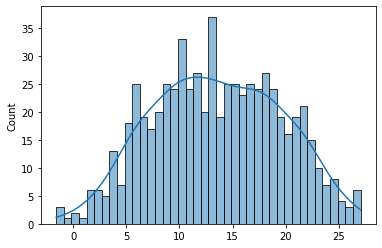

In [21]:
sns.histplot(y_pred,bins=40,kde=True)
# the predictions are distributed normally, although we noted at the beginning of the project that the throughput is not distributed normally but rather exponentially

In [22]:
# y.describe().drop(['count'])

In [23]:
res = y_test - y_pred
res.describe().drop('count')

mean    -0.078811
std      4.115064
min    -13.669982
25%     -2.734615
50%     -0.249554
75%      2.185352
max     16.153983
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

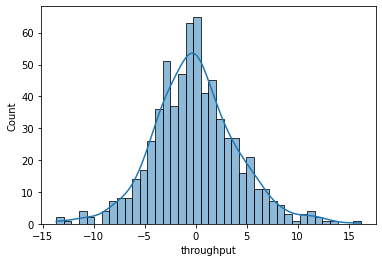

In [24]:
sns.histplot(data=res, kde=True,bins=40)

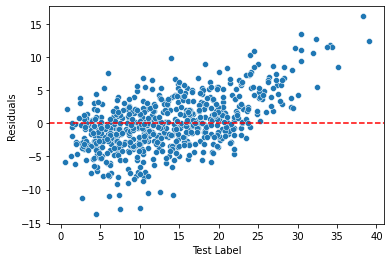

In [25]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

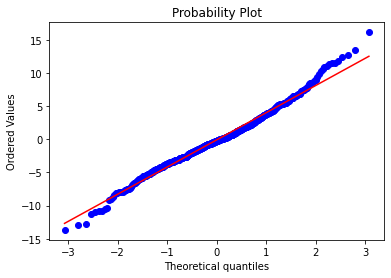

In [26]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_lin = scaler.transform(X)

linear_model = LinearRegression()
linear_model.fit(X_lin,y)

LinearRegression()

In [28]:
# model.coef_

In [29]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df.sort_values('beta')

In [30]:
# linear_model.coef_

In [31]:
coef_df = pd.DataFrame(data=linear_model.coef_,index=X.columns,columns=['beta'])
coef_df.sort_values('beta').transpose()

,region_urban,distance,rtt,alt,ta,ci_27771904,ci_27771905,ci_27771906,ci_33527561,ci_28371201,ci_27771909,ci_27771907,ci_28368651,ci_27771908,ci_33527559,ci_28365057,ci_30422273,weekday_Monday,cqi,weekday_Tuesday,weekday_Thursday,ci_29391105,dir,ci_27770888,ci_28368386,region_suburban,ci_29568769,ci_29391104,ci_29563904,ci_28367106,ci_26379013,ci_28367105,ci_33837570,ci_27256324,ci_29391106,weekday_Wednesday,ci_33527554,ci_28365056,ci_27299331,acc,ci_26378754,ci_26378498,ci_27770883,ci_30492930,hour,ci_27770885,ci_31281409,ci_26378497,ci_26796291,ci_27299332,ci_26385408,ci_27029251,ci_33519104,sinr,ci_29398276,ci_27256325,ci_26796290,ci_28365058,ci_28368384,ci_31263232,ci_26385409,ci_29401601,ci_26385410,ci_28371200,speed,rsrq,ci_33527552,ci_27771140,ci_29913345,ci_26378755,ci_29913344,ci_29568768,ci_29913346,ci_27771139,ci_28371202,rsrp,lon,lat,region_highway,payload
beta,-3.857599,-2.772333,-1.199014,-0.988279,-0.965829,-0.556737,-0.554754,-0.540559,-0.428963,-0.4167,-0.399196,-0.270884,-0.251585,-0.246916,-0.190044,-0.18916,-0.15897,-0.102194,-0.075267,-0.071798,-0.06984,-0.064572,-0.060158,-0.058025,-0.010155,0.006044,0.008048,0.011663,0.041332,0.044839,0.061228,0.067775,0.086381,0.093822,0.096855,0.146871,0.147938,0.155683,0.170562,0.175708,0.176025,0.19676,0.197619,0.211681,0.24012,0.242052,0.258283,0.27065,0.272426,0.293402,0.308749,0.313959,0.327057,0.330364,0.354914,0.367056,0.382734,0.401164,0.440287,0.462443,0.470101,0.528386,0.549526,0.571994,0.579413,0.58538,0.638843,0.690268,0.709155,0.71658,0.741514,0.946548,1.012682,1.040496,1.177089,1.519021,2.195898,3.860039,3.947604,4.88771


In [32]:
coef_df.describe()

,beta
count,80.000000
mean,0.252890
std,1.095614
min,-3.857599
25%,-0.070329
50%,0.175867
75%,0.464358
max,4.887710


In [33]:
delta_df = pd.DataFrame(data=linear_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
delta_df

,delta_beta
distance,-0.704625
lat,1.172197
lon,0.877320
alt,0.715358
speed,0.093888
...,...
region_urban,-0.686730
weekday_Monday,-0.071624
weekday_Thursday,-0.000830
weekday_Tuesday,-0.116647


In [34]:
delta_df.sort_values('delta_beta').transpose()

,distance,region_urban,ci_27771907,ci_27771909,ci_27771905,ci_27771908,weekday_Tuesday,ci_27771906,acc,ci_31281409,ci_27771904,ci_33527561,hour,ci_29913344,ci_30492930,ci_28371201,weekday_Monday,ci_29398276,ci_27299331,ci_29563904,ci_29568768,ci_28368386,ci_30422273,ci_29568769,ci_27256324,ci_33527552,ci_26796290,ci_28371202,weekday_Thursday,ci_29401601,sinr,ci_29391104,cqi,ci_33519104,rsrq,rtt,ci_26796291,ci_26378755,ci_26378498,dir,ci_26379013,ci_29913346,ci_33527559,ci_31263232,ci_26378497,ci_26378754,ci_27299332,ci_27770888,ci_27029251,ci_28367106,ci_29391106,ci_28368651,speed,ci_29913345,weekday_Wednesday,ci_33837570,ci_28365057,ci_28365056,ci_27771140,payload,ci_27256325,ci_28365058,rsrp,ci_27770885,ci_33527554,ci_27770883,ci_28368384,ci_26385410,ci_28371200,ta,ci_26385409,ci_28367105,ci_29391105,ci_26385408,region_suburban,ci_27771139,region_highway,alt,lon,lat
delta_beta,-0.704625,-0.68673,-0.358326,-0.325976,-0.161488,-0.149427,-0.116647,-0.111234,-0.096512,-0.088395,-0.087206,-0.086781,-0.083126,-0.082036,-0.073178,-0.071774,-0.071624,-0.060381,-0.059846,-0.059768,-0.027429,-0.021563,-0.020769,-0.020481,-0.019219,-0.018105,-0.016488,-0.008929,-0.00083,-0.000736,0.008029,0.01561,0.019274,0.020868,0.020904,0.021081,0.021785,0.023047,0.026682,0.030184,0.030639,0.031335,0.032197,0.034549,0.042238,0.04275,0.050573,0.065304,0.071122,0.071384,0.085478,0.086622,0.093888,0.098741,0.102764,0.104533,0.113196,0.114176,0.116461,0.119191,0.12437,0.125241,0.146148,0.147826,0.157899,0.158887,0.175856,0.182017,0.182636,0.194214,0.203039,0.210615,0.217899,0.245813,0.323376,0.373534,0.436966,0.715358,0.87732,1.172197


<AxesSubplot:ylabel='Count'>

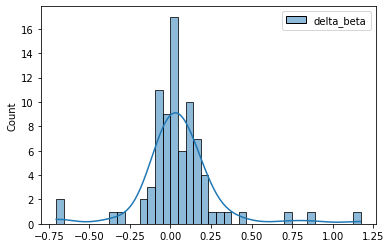

In [35]:
sns.histplot(data=delta_df,bins=40,kde=True)

In [36]:
y_pred_lin = linear_model.predict(X_lin)

<AxesSubplot:ylabel='Count'>

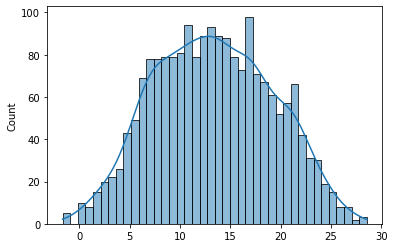

In [37]:
sns.histplot(y_pred_lin,bins=40,kde=True)

In [38]:
# sns.histplot(y,bins=40,kde=True)

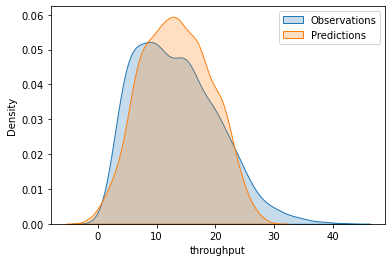

In [39]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_lin, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

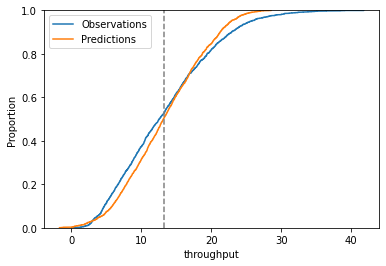

In [40]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_lin, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [41]:
mae = mean_absolute_error(y,y_pred_lin)
mse = mean_squared_error(y,y_pred_lin)
rmse = np.sqrt(mse)

In [42]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['LR'])
err_df

,LR
MAE,2.988244
MSE,15.354659
RMSE,3.918502


In [43]:
# y_pred_lin.mean()

In [44]:
# y.describe().drop('count')

In [56]:
# y.mean()

In [54]:
# f"{y.mean()/mae:.2f}% error range for MAE (on average predictions are off by this procent)"

In [55]:
# f"{y.mean()/rmse:.2f}% error range for RMSE (on average predictions are off by this procent)"

In [46]:
err_df.to_csv('./model-err/lin-model-err.csv')

In [47]:
from joblib import dump, load
dump(linear_model, './models/lin-model.joblib')

['./models/lin-model.joblib']

DONE!